# Linear Regression

**Objective**: Use linear regression to predict home prices over the past decade.

* Dependent variable: Sales price
* Independent variable: Square footage

## Least Squares Method

Minimize error, or loss, as defined by:
$$ L(x) = \sum_{i=1}^{n}(y_{i}-p_{i})^2 $$

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# read in our data
henrico = pd.read_excel('C:\\Users\\RP\\Documents\\Academics\\ENMA854-BigDataFundamentals\\HousingData\\Henrico Sales '
                        'Data.xlsx')

In [7]:
henrico.head()

,Gpin,Prop_addr,Prop_city,Prop_st,Prop_zip,Subdivision,Sale_date,Sale_price,Deed,Grantee,...,BrickStoneFP,OtherFP,HeatDesc,ACDesc,Parcel_Status,Foundation,BasementArea,LandAsmt,BldgAsmt,TotalAsmt
0,727-757-9917,WILDE LAKE DR,HENRICO,VA,23233,Acreage,1988-12-01,0.0,2168/2372,COUNTY OF HENRICO,...,NaN,NaN,NaN,NaN,A,NaN,NaN,146000.0,0.0,146000.0
1,728-750-9986,2401 OLD COACH LN,HENRICO,VA,23238-3060,Barclay,2004-09-30,0.0,3746/ 269,RICKETTS RUSSELL L JR & ROBIN W,...,NaN,1.0,Heat Pump,Yes,A,Crawl,NaN,69000.0,215100.0,284100.0
2,728-750-9986,2401 OLD COACH LN,HENRICO,VA,23238-3060,Barclay,1992-08-01,121000.0,2374/ 965,RICKETTS RUSELL L JR,...,NaN,1.0,Heat Pump,Yes,A,Crawl,NaN,69000.0,215100.0,284100.0
3,728-750-9986,2401 OLD COACH LN,HENRICO,VA,23238-3060,Barclay,1992-07-01,103500.0,2371/ 270,EAGLE CONSTRUCTION OF VA,...,NaN,1.0,Heat Pump,Yes,A,Crawl,NaN,69000.0,215100.0,284100.0
4,728-750-9986,2401 OLD COACH LN,HENRICO,VA,23238-3060,Barclay,NaT,0.0,2154/ 720,WILTON E CARLTON & BETTY,...,NaN,1.0,Heat Pump,Yes,A,Crawl,NaN,69000.0,215100.0,284100.0


In [8]:
# let's look at zip code data first
henrico['Prop_zip'].value_counts()

23060         48677
23228         39675
23231         39216
23229         37945
23059         31389
23223         26765
23150         15948
23238         15114
23227         14642
23233         14077
23075         12661
23294         11378
23226         11335
23222          8440
23230          5618
23233-7604      524
23233-7642      429
23059-5603      333
23059-5801      284
23223-5955      258
230605817       244
23059-5304      218
23059-5803      196
23233-2424      163
23059-5722      144
23233-3502      140
23059-7100      138
23294-4302      138
23238-3064      134
23233-7678      134
              ...  
23228-1535        1
232317424         1
232235950         1
232284221         1
23233-1712        1
23233-7536        1
232235951         1
23233-7010        1
23233-7787        1
23233-1113        1
232316217         1
23233-1676        1
23150-3404        1
23238-3036        1
23233-6944        1
23060-3238        1
23238-5721        1
23238-3236        1
23150-3411        1


In [9]:
# We can see we have more than 1900 different zip codes due to inconsistent formatting
# We can clean that up. Let's first split on the hypen
henrico[['zip','zip_last_four']] = henrico['Prop_zip'].str.split('-',expand=True)
henrico['zip'].value_counts()

23060        49128
23228        40329
23231        39283
23059        38821
23229        38244
23233        37386
23223        27207
23238        24931
23150        16350
23227        14782
23075        13441
23294        11858
23226        11484
23222         8447
23230         5688
230605817      244
23273           90
232273186       67
232273109       39
232286403       38
232286404       38
232281507       34
232281537       30
230604229       28
23030           28
232231948       27
232273110       26
232281502       22
232231947       21
232273187       20
             ...  
23225            2
230751230        2
230594626        2
232315801        2
231505714        2
230752111        2
232281535        2
23250            2
230605216        2
230752629        2
232284839        2
230595494        2
232317217        2
231505802        2
230596973        2
232294512        2
232235604        2
232285532        2
232316217        1
232235951        1
232286428        1
232284221   

In [10]:
# Better. We can also set zip to be the first 5 characters in the string
# We are throwing away the last four data here, but we wont need that for this analysis
henrico['zip'] = henrico['zip'].str[0:5]
henrico['zip'].value_counts()

23060    49473
23228    40674
23231    39340
23059    39040
23229    38278
23233    37386
23223    27293
23238    24931
23150    16439
23227    14967
23075    13483
23294    11864
23226    11490
23222     8466
23230     5691
23273       90
23030       28
23259       11
23250        2
23225        2
Name: zip, dtype: int64

In [11]:
# Now we can create a filter for houses in 23228
in23228 = (henrico['zip'] == '23228')
zip_df = henrico[in23228]

In [12]:
# How many transactions does that data include?
zip_df.shape

(40674, 34)

C:\Users\RP\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


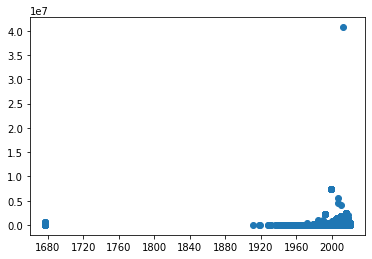

In [13]:
# Almost 41,000 sales
plt.scatter(zip_df['Sale_date'],zip_df['Sale_price'])

In [14]:
# looks like we have some outlier sale prices and dates
# Let's look at sales in the past decade and under $1M
isRecent = (zip_df['Sale_date'] > '2010-06-01')
normalPrice = (zip_df['Sale_price'] < 1000000)
zip_df = zip_df[(isRecent) & (normalPrice)]

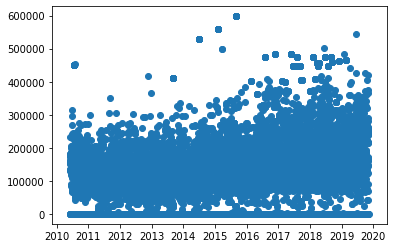

In [15]:
plt.scatter(zip_df['Sale_date'],zip_df['Sale_price'])

In [16]:
# Looks like a line of houses near zero. These are probably inheritance or otherwise not "on the market" normal sales.
greaterThan1000 = (zip_df['Sale_price'] > 1000)
zip_df = zip_df[greaterThan1000]

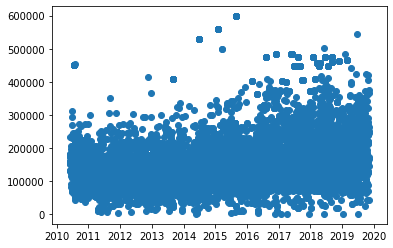

In [17]:
plt.scatter(zip_df['Sale_date'],zip_df['Sale_price'])

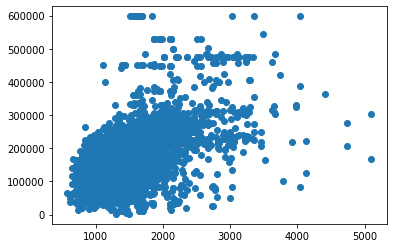

In [21]:
# Now let's look at trends with square footage
plt.scatter(zip_df['Sfla'],zip_df['Sale_price'])

In [22]:
# Looks pretty good. Let's look for missing data
print("Missing records in square footage:",zip_df['Sfla'].isna().sum())
print("Missing records in sale price:",zip_df['Sale_price'].isna().sum())

Missing records in square footage: 0
Missing records in sale price: 0


In [20]:
# Almost 1,000 transactions with missing square footage details. Let's drop those.
zip_df.dropna(axis='index',how='any',subset=['Sfla'],inplace=True)

In [23]:
# Let's start our linear regression.
# Let X be our independent variable, square footage
# Let Y be our dependent variable, sale price
X = zip_df['Sfla']
Y = zip_df['Sale_price']

In [24]:
# First, let's find the mean of X and Y
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print(X_mean,Y_mean)

1396.4244891177937 161852.91476989535


In [18]:
# Now we can build the model using the equation from above
numerator = 0
denominator = 0
for i in range(len(X)):
    numerator += (X.iloc[i]-X_mean)*(Y.iloc[i]-Y_mean)
    denominator += (X.iloc[i]-X_mean)**2
m = numerator/denominator
c = Y_mean - m*X_mean

In [19]:
m

92.83490649439223

In [20]:
c

32215.97789616554

In [21]:
def predict_sale_price(square_feet):
    return ((square_feet*92.83490649439223) + 32215.97789616554)

In [22]:
zip_df['predicted_sale_price'] = zip_df['Sfla'].apply(predict_sale_price)

In [23]:
zip_df['error_in_prediction'] = np.abs(zip_df['Sale_price']-zip_df['predicted_sale_price'])

In [24]:
zip_df['error_in_prediction'].describe()

count      6019.000000
mean      43606.172645
std       45887.304689
min           3.511869
25%       14596.622644
50%       32264.092755
75%       56785.561203
max      425417.643484
Name: error_in_prediction, dtype: float64

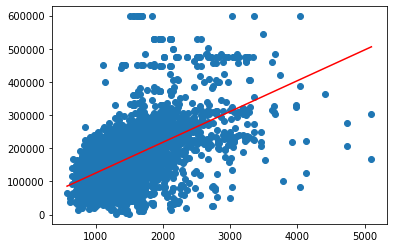

In [25]:
plt.scatter(zip_df['Sfla'],zip_df['Sale_price'])
plt.plot([zip_df['Sfla'].min(),zip_df['Sfla'].max()],[zip_df['predicted_sale_price'].min(),zip_df['predicted_sale_price'].max()],c='red')

In [26]:
# Average error of $43,000 doesn't sound too good.  Could we do this analysis again with only a single year of data?
year2015 = ((zip_df['Sale_date'] >= '2015-01-01') & (zip_df['Sale_date']<='2015-12-31'))
zip_df_2015 = zip_df[year2015]
zip_df_2015.drop(['predicted_sale_price','error_in_prediction'],axis=1,inplace=True)

C:\Users\RP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
X = zip_df_2015['Sfla']
Y = zip_df_2015['Sale_price']

X_mean = np.mean(X)
Y_mean = np.mean(Y)

numerator = 0
denominator = 0
for i in range(len(X)):
    numerator += (X.iloc[i]-X_mean)*(Y.iloc[i]-Y_mean)
    denominator += (X.iloc[i]-X_mean)**2
    
m = numerator/denominator
c = Y_mean - m*X_mean

def predict_sale_price(square_feet):
    return ((square_feet*m) + c)

zip_df_2015['predicted_sale_price'] = zip_df_2015['Sfla'].apply(predict_sale_price)
zip_df_2015['error_in_prediction'] = np.abs(zip_df_2015['Sale_price']-zip_df_2015['predicted_sale_price'])
zip_df_2015['error_in_prediction'].describe()

C:\Users\RP\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\RP\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count       699.000000
mean      42319.978751
std       61196.617596
min          34.525931
25%       12686.552245
50%       27145.105263
75%       48196.196771
max      424959.044385
Name: error_in_prediction, dtype: float64

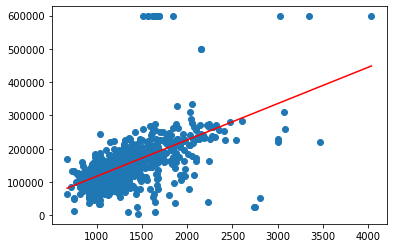

In [28]:
plt.scatter(zip_df_2015['Sfla'],zip_df_2015['Sale_price'])
plt.plot([zip_df_2015['Sfla'].min(),zip_df_2015['Sfla'].max()],[zip_df_2015['predicted_sale_price'].min(),zip_df_2015['predicted_sale_price'].max()],c='red')

In [29]:
# What are these crazy sales where I'm off by a ton?
zip_df_2015[zip_df_2015['error_in_prediction'] > 250000][['Prop_addr','Grantee','Grantor',\
                                                          'Sale_price','predicted_sale_price',\
                                                          'Sfla','TotalAsmt','Parcel_Status','Acres']]

,Prop_addr,Grantee,Grantor,Sale_price,predicted_sale_price,Sfla,TotalAsmt,Parcel_Status,Acres
190303,4519 WISTAR RD,MERIDIAN LAND HOLDINGS LLC,DUNNAVANT JOHN M JR RE TR,500000.0,243265.479428,2155.0,210900.0,I,NaN
190335,4517 WISTAR RD,MERIDIAN LAND HOLDINGS LLC,DUNNAVANT JOHN M JR TRS,500000.0,243265.479428,2155.0,75800.0,I,NaN
230415,1912 HUNGARY OAK CT,OAK KNOLL DEVELOPMENT LLC,NaN,25000.0,306500.315022,2734.0,356300.0,A,0.285
230472,9451 LAUGHING OAK CT,OAK KNOLL DEVELOPMENT LLC,NaN,598000.0,192371.812092,1689.0,350200.0,A,0.538
230487,9442 LAUGHING OAK CT,OAK KNOLL DEVELOPMENT LLC,NaN,598000.0,184836.054482,1620.0,327700.0,A,0.542
230498,9445 LAUGHING OAK CT,OAK KNOLL DEVELOPMENT LLC,NaN,598000.0,178829.291170,1565.0,337200.0,A,0.317
230501,9434 LAUGHING OAK CT,OAK KNOLL DEVELOPMENT LLC,NaN,598000.0,189423.037375,1662.0,353000.0,A,0.341
230504,1912 QUIET OAKS CIR,OAK KNOLL DEVELOPMENT LLC,NaN,598000.0,209081.535488,1842.0,337500.0,A,0.304
230507,9441 LAUGHING OAK CT,OAK KNOLL DEVELOPMENT LLC,NaN,598000.0,185491.337753,1626.0,362500.0,A,0.257
230513,9430 LAUGHING OAK CT,OAK KNOLL DEVELOPMENT LLC,NaN,598000.0,178501.649535,1562.0,344000.0,A,0.263


In [30]:
# 17 of 18 records have 'LLC' in their buyer's name. This suggests these are investment related transactions and that the 
# Sale_price may reflect multiple parcels. There are also a number of sales at exactly the same price, (e.g. $598k)
# Let's filter these out
business_transaction_filter = (zip_df_2015['Grantee'].str.contains("LLC"))
zip_df_2015 = zip_df_2015[~business_transaction_filter]

In [31]:
X = zip_df_2015['Sfla']
Y = zip_df_2015['Sale_price']

X_mean = np.mean(X)
Y_mean = np.mean(Y)

numerator = 0
denominator = 0
slopes = []
intercepts = []
for i in range(len(X)):
    numerator += (X.iloc[i]-X_mean)*(Y.iloc[i]-Y_mean)
    denominator += (X.iloc[i]-X_mean)**2
    slopes.append(numerator/denominator)
    intercepts.append(Y_mean - (numerator/denominator)*X_mean)
    
m = numerator/denominator
c = Y_mean - m*X_mean

def predict_sale_price(square_feet):
    return ((square_feet*m) + c)

zip_df_2015['predicted_sale_price'] = zip_df_2015['Sfla'].apply(predict_sale_price)
zip_df_2015['error_in_prediction'] = np.abs(zip_df_2015['Sale_price']-zip_df_2015['predicted_sale_price'])
zip_df_2015['error_in_prediction'].describe()

count       614.000000
mean      30976.052631
std       26242.805347
min          47.094167
25%       11978.612643
50%       25575.742033
75%       42426.329328
max      235081.228009
Name: error_in_prediction, dtype: float64

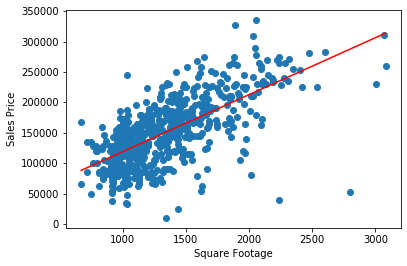

In [45]:
# That brought the mean error down by $13k!!
# Max error is still more than $200k though...

# Let's look at the results again
plt.scatter(zip_df_2015['Sfla'],zip_df_2015['Sale_price'])
plt.plot([zip_df_2015['Sfla'].min(),zip_df_2015['Sfla'].max()],\
         [zip_df_2015['predicted_sale_price'].min(),\
          zip_df_2015['predicted_sale_price'].max()],c='red')
plt.xlabel('Square Footage')
plt.ylabel('Sales Price')
plt.show()

In [33]:
# Big houses selling below the estimate now seems to be the issue
zip_df_2015[zip_df_2015['error_in_prediction'] > 150000][['Prop_addr','Grantee','Grantor',\
                                                          'Sale_price','predicted_sale_price',\
                                                          'Sfla','TotalAsmt','Parcel_Status','Acres']]

,Prop_addr,Grantee,Grantor,Sale_price,predicted_sale_price,Sfla,TotalAsmt,Parcel_Status,Acres
241509,1730 FOREST GLEN RD,LIBERTY HOMES INC,JONES FREDERICK,40000.0,234557.673982,2234.0,284400.0,A,NaN
250663,1605 LITTLETON BLVD,THAWRANI MEETA & SUNIL,M & T BANK,52500.0,287581.228009,2800.0,253600.0,A,NaN


In [34]:
# Did we predict any sales almost exactly right?
zip_df_2015[zip_df_2015['error_in_prediction'] < 1000][['Prop_addr','Grantee','Grantor',\
                                                          'Sale_price','predicted_sale_price',\
                                                          'Sfla','TotalAsmt','Parcel_Status','Acres']]

,Prop_addr,Grantee,Grantor,Sale_price,predicted_sale_price,Sfla,TotalAsmt,Parcel_Status,Acres
163469,4908 BANGOR CT,HOLLOWAY BRITNEY,MATSUDA YUI & SAUL ARNOLDO CORNEJO,135000.0,134318.799763,1164.0,201200.0,A,NaN
168174,4913 CAVAN GREEN CT,RUTHERFORD WENDY L,BLAKE WAYNE C & ALAN PURYEAR,115000.0,115957.286355,968.0,137900.0,A,NaN
179630,5502 MILLSTREAM LN,GOEL VAKUL & SHIVI,SAIDI MOHAMMAD S & FARIMAH M ROFIEI,160000.0,160174.808440,1440.0,180300.0,A,NaN
183575,8629 MILLSTREAM DR,GOLDENSON DANA J,MCKENZIE ROBIN E,159900.0,160174.808440,1440.0,177500.0,A,NaN
190850,9213 SILVERBUSH DR,GOPALAN VENUGOPAL B,MONACO JOSEPH A & CHERYL,159950.0,160174.808440,1440.0,186900.0,A,NaN
195937,9002 SILVERBUSH DR,ELLIS JAMES W,EVANS AMY M,155000.0,154179.212225,1376.0,179900.0,A,NaN
210907,8413 BROADWAY AVE,CANARY DONALD H & ROBIN L,MENDEZ MICHAEL T,168175.0,167856.666091,1522.0,176600.0,A,NaN
221630,2918 PUTNEY RD,REINHARD EMMA K,PUTNEY LLC,173000.0,172915.450397,1576.0,201500.0,A,NaN
222413,2306 POATES DR,PULLIN ROBERT E & KAITLYN G A,HALL SHARON L & G S BURGE & JOHN D,169500.0,168793.477999,1532.0,205500.0,A,NaN
229641,7702 HERMITAGE RD,METZ MICHAEL D H,PROCTOR JESSE R,99900.0,100218.846290,800.0,124400.0,A,NaN
